In this notebook we are performing Exploratory analysis on prepocessed data. We are ploting distibution plot, scatter plot and correlation matrix.

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.utils import resample
sns.set(font_scale=2)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df_original = pd.read_pickle('/content/gdrive/MyDrive/Project/Data/whole_set_selected_preprocessed_normalized_fixed.pkl')
df = df_original.loc[:, ["n_EAR", 
                    "n_MAR", "n_MOE", "n_EC",
                    "n_LEB", "n_SOP", "PERCLOS", "CLOSENESS", "DROWSINESS"]]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lo

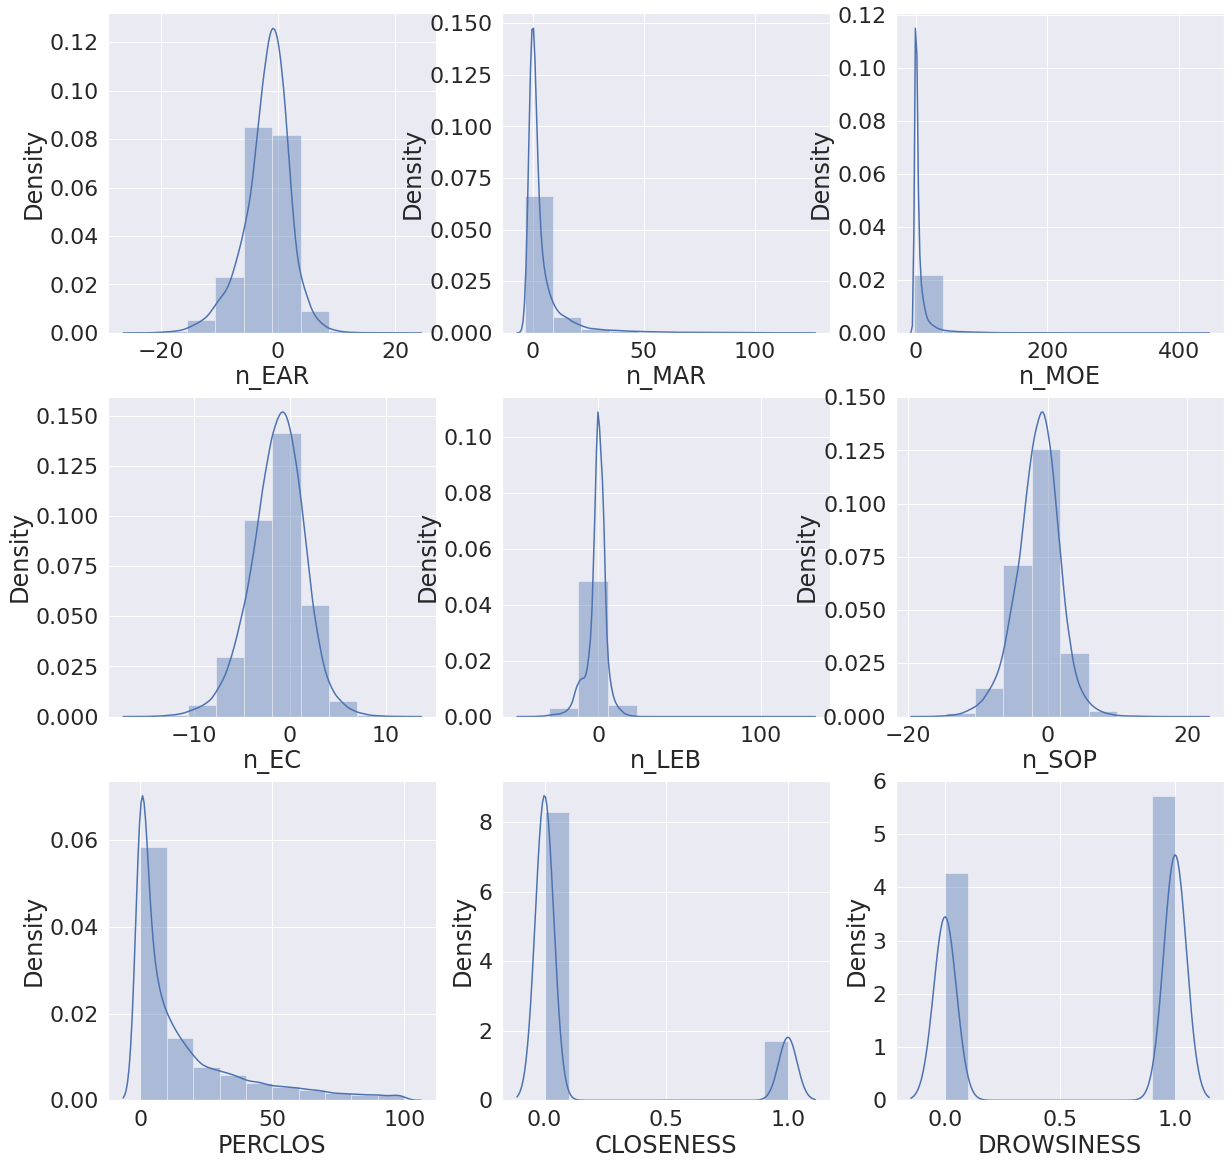

In [ ]:
# plot distributions
plt.figure(figsize=(20,20))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    sns.distplot(df[df.columns[i-1]],bins=10,kde_kws={'bw':0.1})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor 

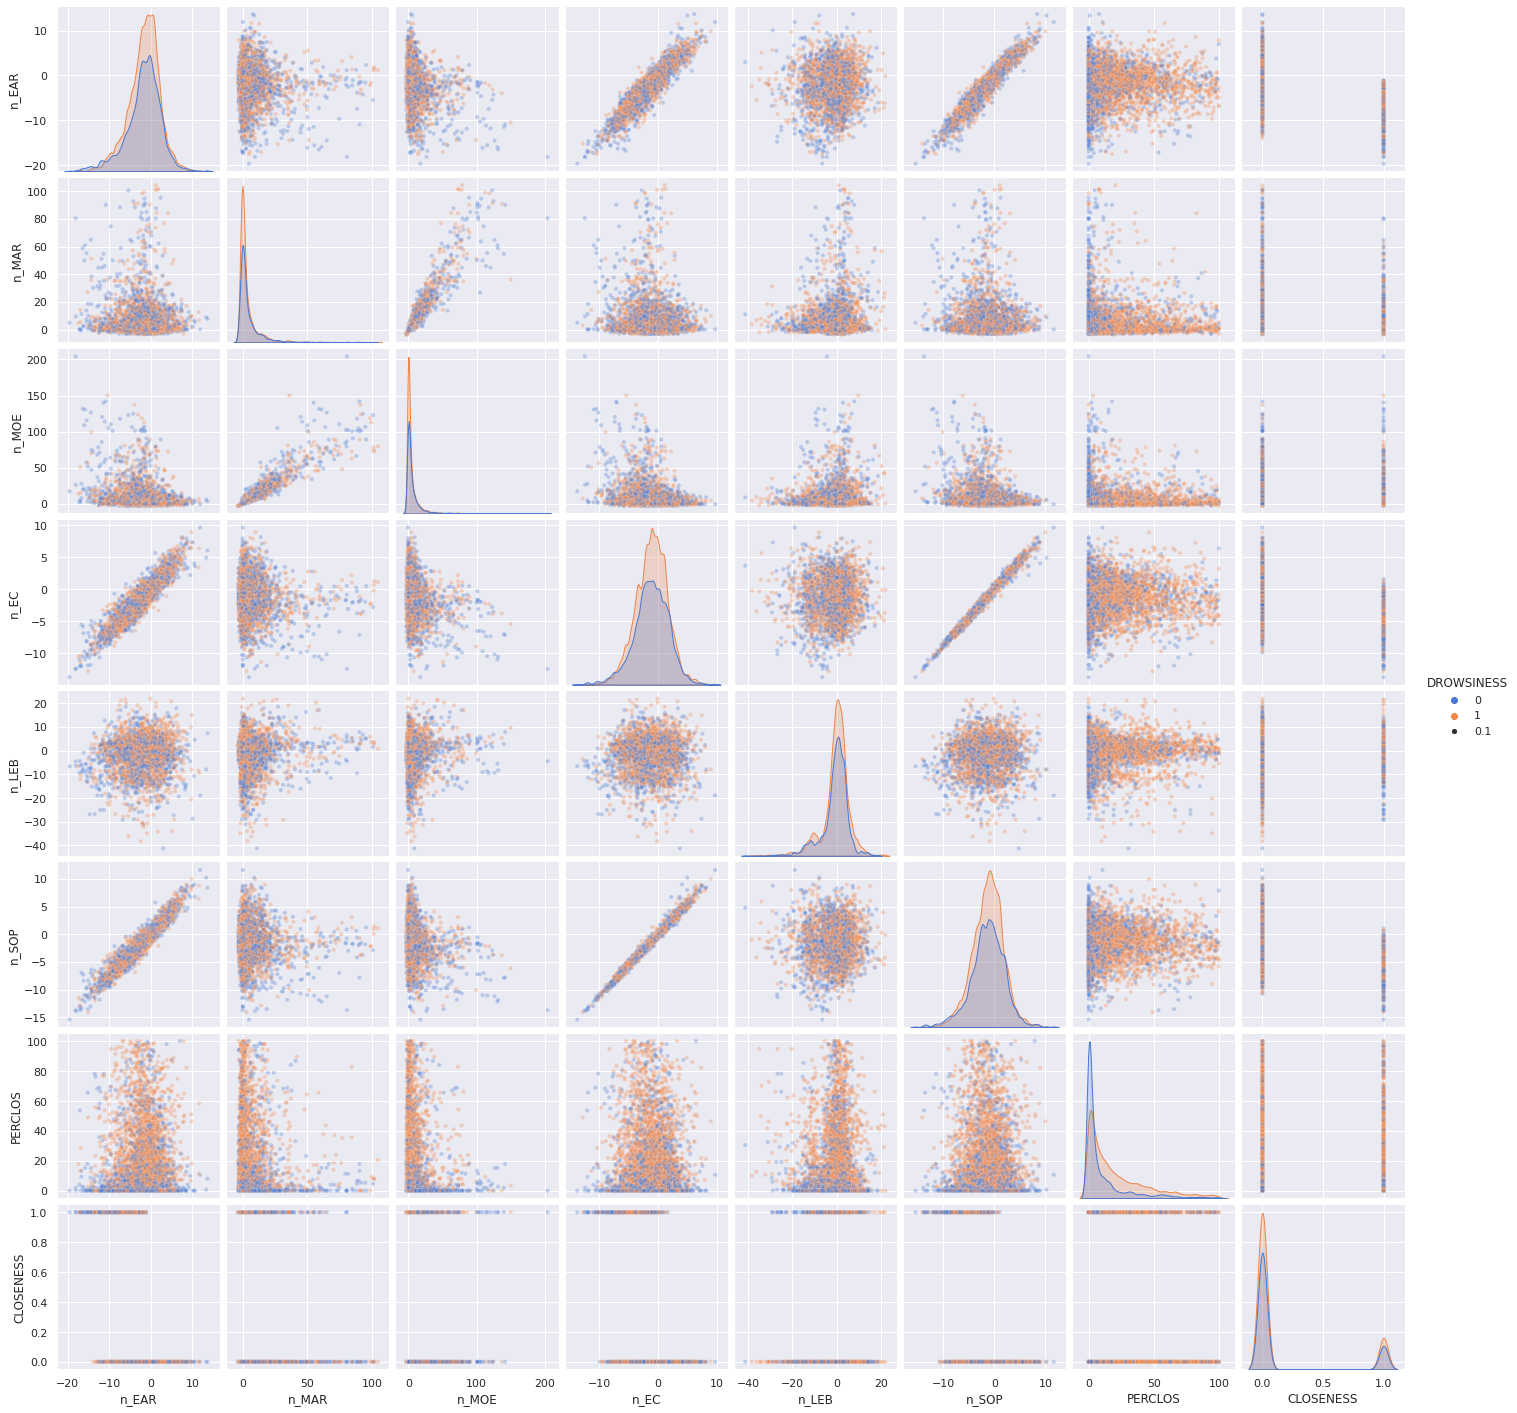

In [ ]:
# resample to prevent overlappings then display scatter plots of features
r_df = resample(df, n_samples=5000, replace=False, stratify=df['DROWSINESS'], random_state=0)
g = sns.pairplot(data=r_df, hue="DROWSINESS", palette="muted",diag_kind="kde", plot_kws={'size':0.1, 'alpha': 0.3}, diag_kws={'bw':0.1})

In [ ]:
r_df['DROWSINESS'].unique()

array([0, 1])

In [ ]:
# calculate correlation
y = df['DROWSINESS']
X = df.drop(columns=["DROWSINESS"])
x_corr = X.corr()

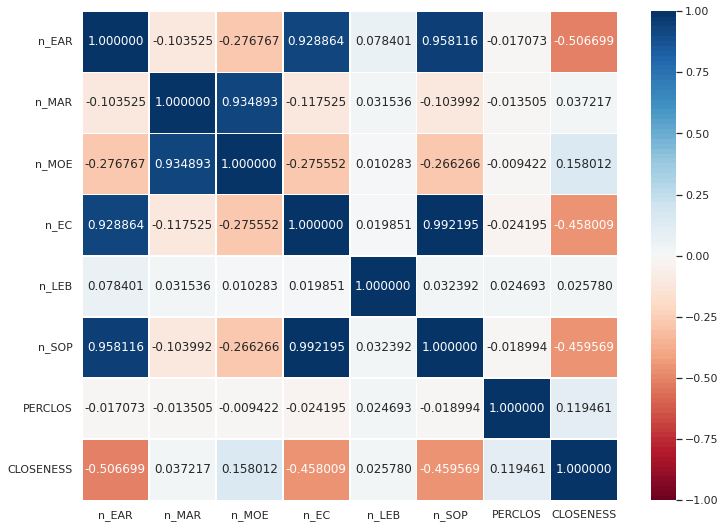

In [ ]:
# correlation matrix
sns.set(font_scale=1)
plt.figure(figsize=(12,9))
sns.heatmap(x_corr, annot=True, fmt="f",vmin=-1, vmax=1, linewidths=.5, cmap = sns.color_palette("RdBu", 100))
plt.yticks(rotation=0)
plt.show()